# Nigeria Export Crude Oil Production and Price
Accoriding to [Wikipedia](https://en.wikipedia.org/wiki/Petroleum_industry_in_Nigeria#:~:text=Nigeria%20is%20the%20largest%20oil,paraffinic%20and%20low%20in%20sulfur.), Nigeria is the largest oil and gas producer in Africa. [Crude oil](https://en.wikipedia.org/wiki/Petroleum) from the [Niger delta basin](https://en.wikipedia.org/wiki/Niger_Delta) comes in two types: [light](https://en.wikipedia.org/wiki/Light_crude_oil), and comparatively [heavy](https://en.wikipedia.org/wiki/Heavy_crude_oil) – the lighter has around 36 gravity while the heavier has 20–25 gravity. Both types are [paraffinic](https://en.wikipedia.org/wiki/Alkane) and low in [sulfur](https://en.wikipedia.org/wiki/Sulfur).Nigeria's economy and budget have been largely supported from income and revenues generated from the petroleum industry since 1960. Statistics as at February 2021 shows that the Nigerian oil sector contributes to about 9% of the entire [GDP](https://en.wikipedia.org/wiki/Gross_domestic_product) of the nation. Nigeria is the largest oil and gas producer in Africa, a major exporter of crude oil and petroleum products to the United States of America. In 2010, Nigeria exported over one million barrels per day to the United States of America, representing 9% of the U.S. total crude oil and petroleum products imports and over 40% of Nigeria exports.

This project involves the use of [**SQL**](https://www.w3schools.com/sql/) and [**Python**](https://www.python.org/) programming language. SQL will be used to answer the given question while Python will be used to present the answers as a dataframe and visualize it where necessary.

The data used for this analysis can be found on [Central Bank of Nigeria (CBN) Statistic section](https://www.cbn.gov.ng/rates/crudeoil.asp). It contain 5 fields with 201 records.

<h1 id="crude_oil"><code>CrudeOilPrice</code></h1>
<table>
<thead>
<tr>
<th>column</th>
<th>type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>year</code></td>
<td><code>varchar</code></td>
<td>Year of production</td>
</tr>
<tr>
<td><code>month</code></td>
<td><code>smallint</code></td>
<td>Month in each year</td>
</tr>
<tr>
<td><code>crude_oil_price</code></td>
<td><code>decimal</code></td>
<td>Price of crude oil (US$/Barrel)</td>
</tr>
<tr>
<td><code>production</code></td>
<td><code>decimal</code></td>
<td>Crude oil produced in millions barrels per day (mbd)</td>
</tr>
<tr>
<td><code>crude_oil_export</code></td>
<td><code>decimal</code></td>
<td>Crude oil exported in millions barrels per day (mbd)</td>
</tr>
</tbody>
</table>



In [1]:
import pandas as pd
crudeOil = pd.read_csv('CrudeOilProdPrice25102022.csv', index_col=False)

In [2]:
crudeOil

,Year,Month,Crude Oil Price,Production,Crude Oil Export
0,2006,1,63.85,2.59,2.14
1,2006,2,61.33,2.47,2.02
2,2006,3,65.00,2.25,1.80
3,2006,4,72.09,2.32,1.87
4,2006,5,71.18,2.28,1.83
...,...,...,...,...,...
196,2022,5,116.72,1.02,0.57
197,2022,6,130.10,1.16,0.71
198,2022,7,120.54,1.08,0.63
199,2022,8,106.34,0.97,0.52


In [3]:
crudeOil.rename(columns={
   "Year": "year", 
    "Month": "month",
    "Crude Oil Price": "crude_oil_price",
    "Production": "production",
    "Crude Oil Export": "crude_oil_export"
}, inplace=True)
crudeOil

,year,month,crude_oil_price,production,crude_oil_export
0,2006,1,63.85,2.59,2.14
1,2006,2,61.33,2.47,2.02
2,2006,3,65.00,2.25,1.80
3,2006,4,72.09,2.32,1.87
4,2006,5,71.18,2.28,1.83
...,...,...,...,...,...
196,2022,5,116.72,1.02,0.57
197,2022,6,130.10,1.16,0.71
198,2022,7,120.54,1.08,0.63
199,2022,8,106.34,0.97,0.52


In [4]:
crudeOil["month"].replace({
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}, inplace=True)


In [5]:
crudeOil.corr()['crude_oil_export']

year               -0.751553
crude_oil_price     0.199156
production          1.000000
crude_oil_export    1.000000
Name: crude_oil_export, dtype: float64

In [6]:
import seaborn as sb

<AxesSubplot:xlabel='production'>

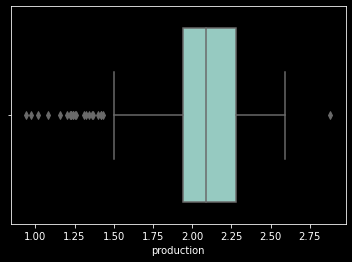

In [35]:
sb.boxplot(data=crudeOil, x='production')

<AxesSubplot:xlabel='production', ylabel='Density'>

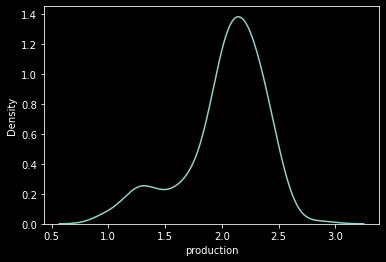

In [36]:
sb.kdeplot(x=crudeOil.production)

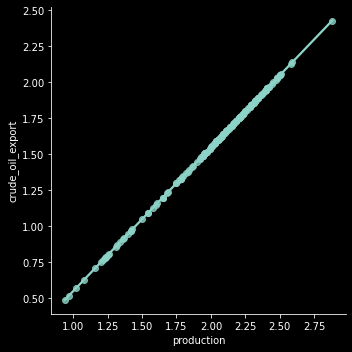

In [7]:
sb.lmplot(data=crudeOil, x="production", y="crude_oil_export", fit_reg=True, ci=None);

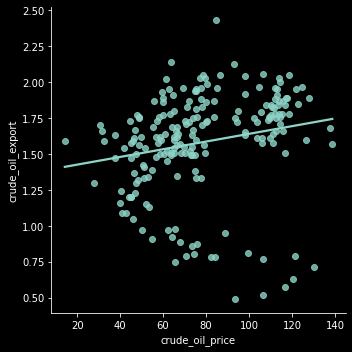

In [8]:
sb.lmplot(data=crudeOil, x="crude_oil_price", y="crude_oil_export", fit_reg=True, ci=None);

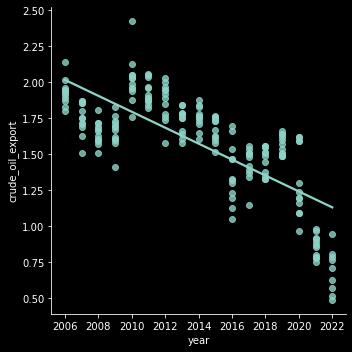

In [9]:
sb.lmplot(data=crudeOil, x="year", y="crude_oil_export", fit_reg=True, ci=None);

<AxesSubplot:ylabel='Frequency'>

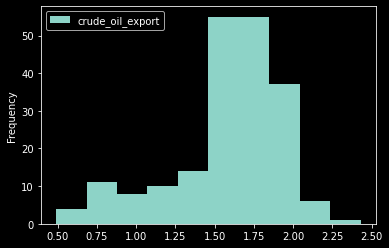

In [10]:
crudeOil.plot.hist(y="crude_oil_export")

In [11]:
crudeOil.isnull().any()

year                False
month               False
crude_oil_price     False
production          False
crude_oil_export    False
dtype: bool

In [12]:
train = crudeOil[crudeOil["year"] < 2020].copy()
test = crudeOil[crudeOil["year"] > 2020].copy()

In [13]:
train.shape

(168, 5)

In [14]:
test.shape

(21, 5)

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [16]:
predictors = "production"
target = "crude_oil_export"

In [17]:
reg.fit(train[["production"]], train["crude_oil_export"])

LinearRegression()

In [18]:
predictions = reg.predict(test[["production"]])
predictions

array([0.91, 0.97, 0.98, 0.92, 0.89, 0.86, 0.87, 0.79, 0.8 , 0.78, 0.78,
       0.75, 0.95, 0.81, 0.79, 0.77, 0.57, 0.71, 0.63, 0.52, 0.49])

In [19]:
test["predictions"] = predictions

In [20]:
test

,year,month,crude_oil_price,production,crude_oil_export,predictions
180,2021,January,54.87,1.36,0.91,0.91
181,2021,February,62.48,1.42,0.97,0.97
182,2021,March,65.62,1.43,0.98,0.98
183,2021,April,64.30,1.37,0.92,0.92
184,2021,May,67.83,1.34,0.89,0.89
185,2021,June,73.46,1.31,0.86,0.86
186,2021,July,75.93,1.32,0.87,0.87
187,2021,August,70.72,1.24,0.79,0.79
188,2021,September,74.55,1.25,0.80,0.80
189,2021,October,84.11,1.23,0.78,0.78


In [21]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["crude_oil_export"], test["predictions"])
error

1.8503717077085943e-16

In [22]:
crudeOil.describe()["crude_oil_export"]

count    201.000000
mean       1.581741
std        0.357104
min        0.490000
25%        1.490000
50%        1.640000
75%        1.830000
max        2.430000
Name: crude_oil_export, dtype: float64

In [23]:
x = train["production"]
y = train["crude_oil_export"]

In [24]:
x.shape

(168,)

In [25]:
y.shape

(168,)

In [26]:
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(168, 1)

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_matrix, y)

LinearRegression()

In [29]:
reg.coef_

array([1.])

In [30]:
reg.intercept_

-0.4500000000000002

In [31]:
predictions = reg.predict(test[["production"]])
predictions

c:\Users\okoro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.91, 0.97, 0.98, 0.92, 0.89, 0.86, 0.87, 0.79, 0.8 , 0.78, 0.78,
       0.75, 0.95, 0.81, 0.79, 0.77, 0.57, 0.71, 0.63, 0.52, 0.49])

In [32]:
test["predictions"] = predictions
test

,year,month,crude_oil_price,production,crude_oil_export,predictions
180,2021,January,54.87,1.36,0.91,0.91
181,2021,February,62.48,1.42,0.97,0.97
182,2021,March,65.62,1.43,0.98,0.98
183,2021,April,64.30,1.37,0.92,0.92
184,2021,May,67.83,1.34,0.89,0.89
185,2021,June,73.46,1.31,0.86,0.86
186,2021,July,75.93,1.32,0.87,0.87
187,2021,August,70.72,1.24,0.79,0.79
188,2021,September,74.55,1.25,0.80,0.80
189,2021,October,84.11,1.23,0.78,0.78
